In [10]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the diabetes dataset

In [4]:
# We'll use the diabetes dataset from the sklearn library
# We have to manually import de datasets module to do so
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
print(diabetes_data.DESCR) # We can view a summary about the data 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

We use 10 feautures:
- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

The target being a quantitative measure of diabetes progression one year after baseline

In [6]:
# We'll create a pandas dataframe to use the data
# We first create the dataframe by adding the Features or X-values
diabetes_df = pd.DataFrame(diabetes_data.data, 
                            columns=diabetes_data.feature_names)
# And we join the Y-value creating a new column called progression
diabetes_df['progression'] = diabetes_data.target

diabetes_df.head() # We can see that the values of the feauture look off
# That's because as the DESCR says
# Note: Each of these 10 feature variables have been mean centered and scaled 
# by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [7]:
# We check that there aren't any missing values
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


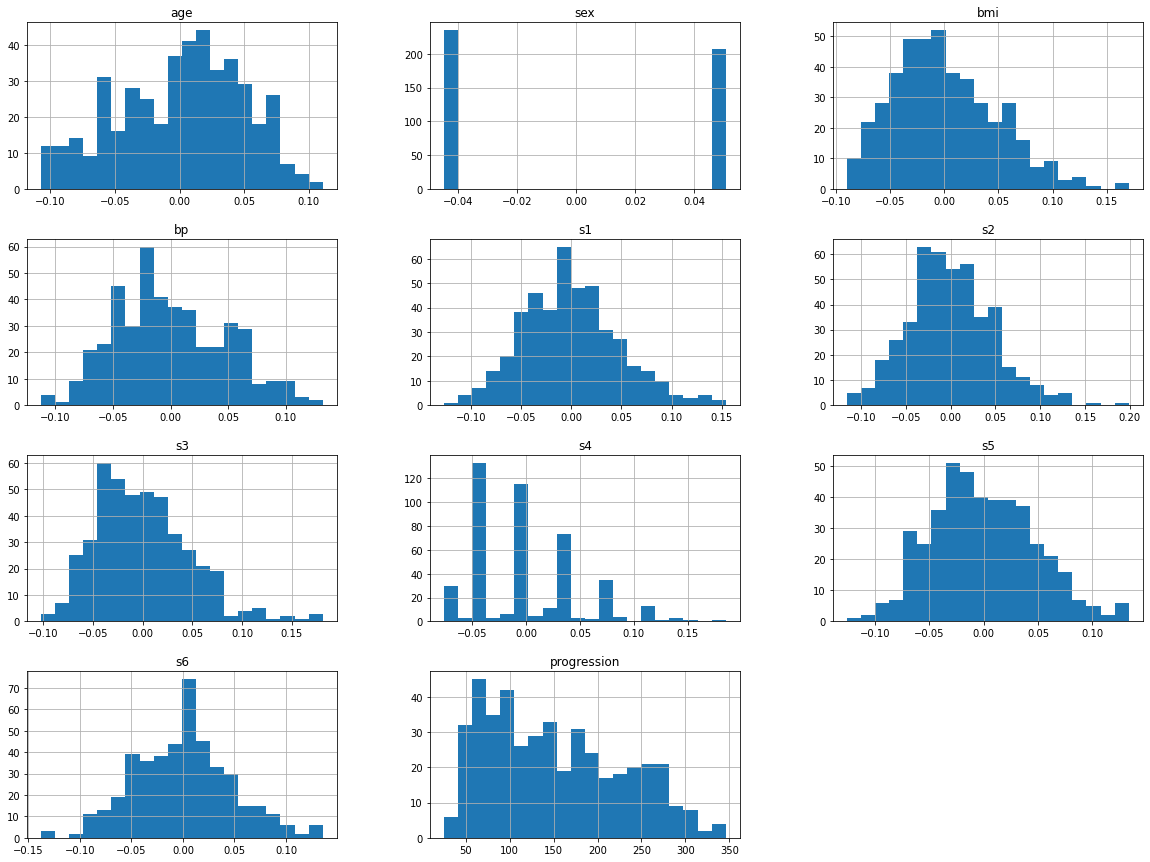

In [24]:
# We can see visually see the efects of how the data was transformed
# Note: mean centered and scaled 
# by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1)
diabetes_df.hist(bins=20, figsize=(20,15));
# We theorize that s1 and s4 originally used to be categorical values because of their distributions.

In [15]:
# Now well check the correlation matrix
corr = diabetes_df.corr()
corr['progression'].sort_values(ascending=False)
# Features that have a correlation over 0.5 with the targe value are
# the bmi, and s5.

progression    1.000000
bmi            0.586450
s5             0.565883
bp             0.441484
s4             0.430453
s6             0.382483
s1             0.212022
age            0.187889
s2             0.174054
sex            0.043062
s3            -0.394789
Name: progression, dtype: float64

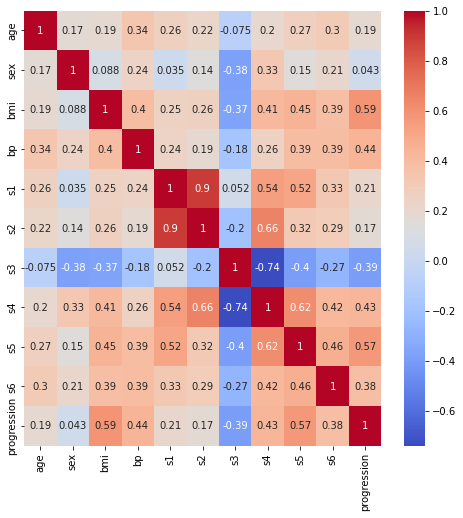

In [21]:
# We plot the correlation matrix
plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm');
# We can also see some features are highly correlated between each other
# Such as s1 and s2, and s1 and s4, s2 and s4.

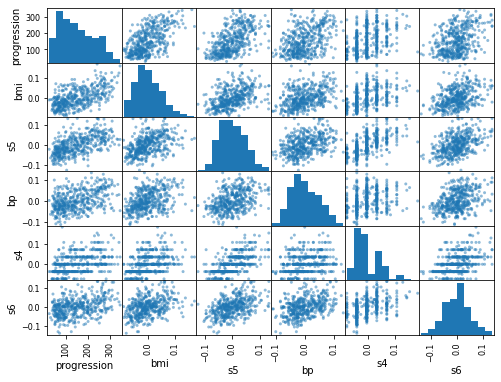

In [20]:
# We can use the scatter matrix to see the data distribution 
# from variables that have a correlation coefficient of over 0.3
from pandas.plotting import scatter_matrix
attributes = ['progression', 'bmi', 's5', 'bp', 's4', 's6']
scatter_matrix(diabetes_df[attributes], figsize=(8, 6));
# bmi and s5 have a more visible linear distribution with progression
# than bp, s6, and s4. 

# Linear Model using SKLearn
We will first create a linear regression model using SKLearn and without feature selection.

In [13]:
# x values
x = diabetes_df.drop(['progression'], axis=1)

In [14]:
# y target
y = diabetes_df['progression']

In [28]:
# We split the data using the sklearn's built in function
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [29]:
# We import the linear model from sklearn
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [30]:
# We train the model using the train data
linear_regression.fit(x_train, y_train)

LinearRegression()

In [32]:
# We use the test values to check the model on unseen data
y_pred = linear_regression.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print(f'rmse: {rmse}, r2: {r2}')

rmse: 56.46063709171876, r2: 0.4800237670581933


Our linear model without feature selection has has an r2 score of 0.48
We can try to improve it using feature selection

## Feauture Selection in Linear Model

### Manual Feature Elimination

We can select features based on the correlation coefficient with the target.
Let's test how we do on a model that only uses feature with over a 0.3 correlation coefficient.

In [52]:
features_over_030 = abs(diabetes_df.corr()['progression'][abs(diabetes_df.corr()['progression'])>0.3].drop('progression')).index.tolist()
features_over_030


['bmi', 'bp', 's3', 's4', 's5', 's6']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x[features_over_030], y, test_size=0.2, random_state=22)
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print(f'rmse: {rmse}, r2: {r2}')

rmse: 56.79533344551293, r2: 0.4738406989284164


Our R2 score dropped to 0.47. However we can test multiple the model for multiple values of the coefficient.

In [58]:
# We start by the lowest value and end at 0.5 because 
coefficient_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
for value in coefficient_values:
    features = abs(diabetes_df.corr()['progression'][abs(diabetes_df.corr()['progression'])> value ].drop('progression')).index.tolist()
    x_train, x_test, y_train, y_test = train_test_split(x[features], y, test_size=0.2, random_state=22)
    linear_regression.fit(x_train, y_train)
    y_pred = linear_regression.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'corr_coefficient is: {value}, rmse: {rmse}, r2: {round(r2, 4)}')


corr_coefficient is: 0, rmse: 56.46063709171876, r2: 0.48
corr_coefficient is: 0.1, rmse: 56.65451634123326, r2: 0.4764
corr_coefficient is: 0.2, rmse: 56.23833705957059, r2: 0.4841
corr_coefficient is: 0.3, rmse: 56.79533344551293, r2: 0.4738
corr_coefficient is: 0.4, rmse: 56.605597566703565, r2: 0.4774
corr_coefficient is: 0.5, rmse: 58.355869844438, r2: 0.4445


In [60]:
features = abs(diabetes_df.corr()['progression'][abs(diabetes_df.corr()['progression'])> 0.2 ].drop('progression')).index.tolist()
features

['bmi', 'bp', 's1', 's3', 's4', 's5', 's6']

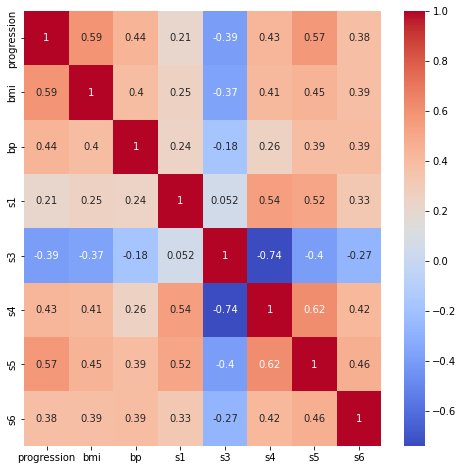

In [63]:
features_corr = diabetes_df[['progression', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']].corr()
plt.subplots(figsize=(8,8))
sns.heatmap(features_corr, annot=True, cmap='coolwarm');

Let's manually add features based on features that have an absolute coefficient of 0.2 with the y value, and
that are correlated by a absolute coefficient of over 0.5 with each other. We do this by looking at the previous correlation matrix plot.
- s1 and s4 have a coefficient of 0.54
- s1 and s5 have a coefficient of 0.52
- s3 and s4 have a coefficient of -0.74
- s4 and s5 have a coefficient of 0.62

In [79]:
df_features = diabetes_df[['progression', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']].copy()
df_features['s1*s4'] = df_features['s1']*df_features['s4']
df_features['s1*s5'] = df_features['s1']*df_features['s5']
df_features['s3*s4'] = df_features['s3']*df_features['s4']
df_features['s4*s5'] = df_features['s4']*df_features['s5']

A model with this new feature has an R2 of 0.4788. Its R2 score dropped compared to the previous model that only cared about features 
that had an absolut coffecient value of 0.2 with the target.

In [77]:
x = df_features.drop(['progression'], axis=1)
y = df_features['progression']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print(f'rmse: {rmse}, r2: {round(r2, 4)}')

corr_coefficient is: 0.5, rmse: 56.524384518521806, r2: 0.4788


We could keep trying different combinations and products of columns based on their correlation score, but we would have to write a lot of code lines.

Thankfully sklearn has built in functions to do feature selection!

### Recursive Feature Elimination
In this example we will use Recursive feature elimination. 

From sklearn's documentation:

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV(cv=10, estimator=LinearRegression(), scoring='r2')
8
Optimal number of features : 8


C:\Users\ALVARO\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


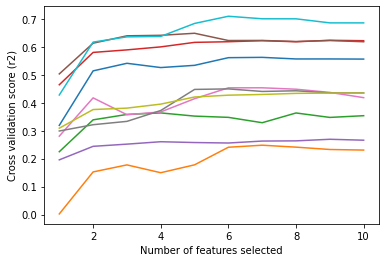

In [117]:
# RFECV performs RFE in a cross-validation loop to find the optimal number of features.
from sklearn.feature_selection import RFECV

x = diabetes_df.drop(['progression'], axis=1)
y = diabetes_df['progression']

lin_reg = LinearRegression()

min_features_to_select = 1

rfecv = RFECV(estimator=lin_reg, scoring='r2', cv=10, step=1, min_features_to_select=min_features_to_select,)

rfecv.fit(x, y)

rfecv.transform(x)

print(rfecv)
print(rfecv.n_features_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)

plt.show()

From the previous plot we see that our best model had an R2 score around 0.7!

In [118]:
# The features that were kept are the following
features_kept = pd.DataFrame({'Features': x.columns,
                             'Kept': rfecv.support_})
features_kept

,Features,Kept
0,age,False
1,sex,True
2,bmi,True
3,bp,True
4,s1,True
5,s2,True
6,s3,True
7,s4,True
8,s5,True
9,s6,False


If you recall, s6 had a coefficient of 0.38 and age had a coefficient of 0.187.

Earlier, by filtering out based on a 0.2 score we had only deleted  s2 and sex.

That is how RFECV helps us to get a better model!

#### On a final note about our data

One final note, however...

If the following cell you can see that if we check the model's score for the whole dataset its R2 score is 0.51.

This difference between the R2 score used during cross validation tells us this is because our dataset is really sensitive to how it's splitted.

In [116]:
rfecv.score(x, y)

0.5148848325387045

We can check our datasets sensitivity by using another built in function from Sklearn called shuffle, to shuffle the rows in our data.

By implementing shuffle before fitting the model the number of optimal features that are selected changes, and the R2 score is different as well.

We recommend to gather more data in the future as a possible fix to this error.


RFECV(cv=10, estimator=LinearRegression(), scoring='r2')
6
Optimal number of features : 6


C:\Users\ALVARO\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


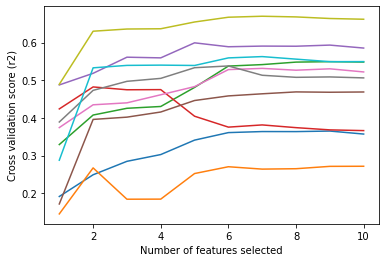

In [119]:
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle

x = diabetes_df.drop(['progression'], axis=1)
y = diabetes_df['progression']

x, y = shuffle(x, y, random_state=0)

lin_reg = LinearRegression()

min_features_to_select = 1

rfecv = RFECV(estimator=lin_reg, scoring='r2', cv=10, step=1, min_features_to_select=min_features_to_select,)

rfecv.fit(x, y)

rfecv.transform(x)

print(rfecv)
print(rfecv.n_features_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)

plt.show()